Group Id: 11

Group Na - meARTIFICIALLY INTELLIGENT, NATURALLY CLUELESSRS

Student Roll No & N
A0ame:49 - A PAWAR 
A052- ARSHIYA PAWNE
A074 - HARSHITA WARANG
RANG

Topic name: Text-Based Mental Health Analysis: An NLP Approach
Dataset: Depression: Twitter Dataset 
https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media
objective: To analyze and classify mental health-related social media posts(Twitter post) using NLP techniques, including sentiment analysis, topic modeling, and machine learning, to aid in early detection and understanding of mental health trends.

In [32]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from collections import Counter



In [ ]:
# Download required NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [5]:
# Load dataset
df = pd.read_csv("C:\\Users\\Aditi\\Downloads\\Mental-Health-Twitter.csv")


In [6]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [5]:
# Check for null values
df.dropna(subset=['post_text', 'label'], inplace=True)

In [19]:
# Text Preprocessing: 
def preprocess_text(text):
    text = text.lower()  # Converting to lowercase
    text = re.sub(r'http\S+', '', text)  # Removing links from tweets
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing special characters & numbers
    words = word_tokenize(text)  # apply tokenization ie splits text into individual words
    words = [word for word in words if word not in stopwords.words('english')]  # Removing stopwords
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [20]:
# Apply preprocessing
df['cleaned_text'] = df['post_text'].apply(preprocess_text)

EDA

In [40]:
# Ensure 'cleaned_text' is tokenized
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

# Flatten all words into a list for frequency analysis
all_words = [word for text in df['tokenized_text'] for word in text]

C:\Users\Aditi\AppData\Local\Temp\ipykernel_22268\1828769997.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words_df['Word'], y=common_words_df['Frequency'], palette="mako")


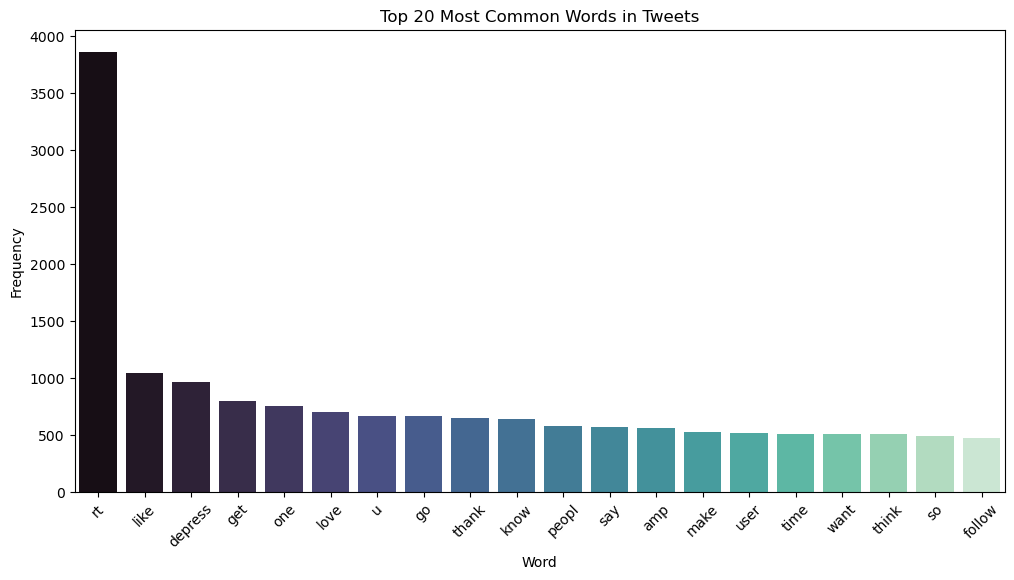

In [41]:
# Most Common Words plot
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)  # Top 20 words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x=common_words_df['Word'], y=common_words_df['Frequency'], palette="mako")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

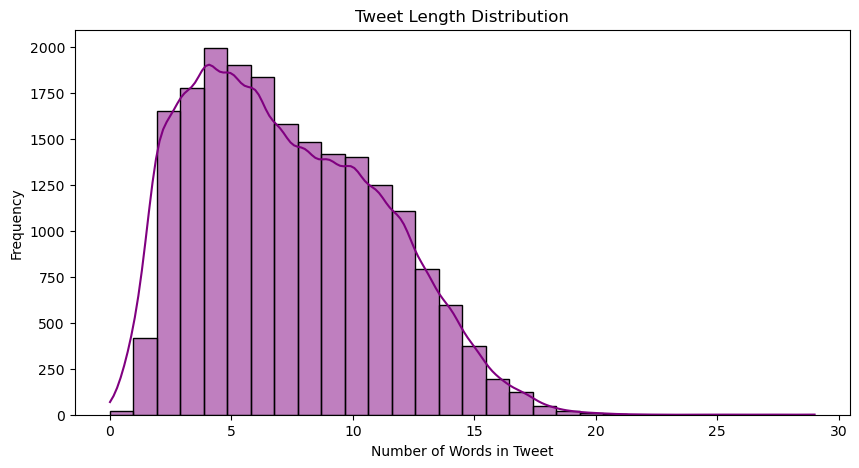

In [42]:
# Tweet Length Distribution
df['tweet_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color="purple")
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Part-of-Speech (POS) Tagging
#Assigns a grammatical label (noun, verb, adjective, etc.) to each word
#It helps in understanding sentence structure and context.
def pos_tagging(text):
    words = word_tokenize(text)
    return pos_tag(words)

df['pos_tags'] = df['cleaned_text'].apply(pos_tagging)

In [10]:
# Feature Extraction (TF-IDF and Bag-of-Words)
#Converts text into a numerical representation by measuring word importance in a document.

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_text']).toarray()

# it creates a word frequency representation of text
bow = CountVectorizer(max_features=5000)
X_bow = bow.fit_transform(df['cleaned_text']).toarray()

In [11]:
# Topic Modeling using LSI
# Identifies Latent topics in text using SVD.
lsi = TruncatedSVD(n_components=5)
topic_matrix = lsi.fit_transform(X_tfidf)
df['topic'] = np.argmax(topic_matrix, axis=1)


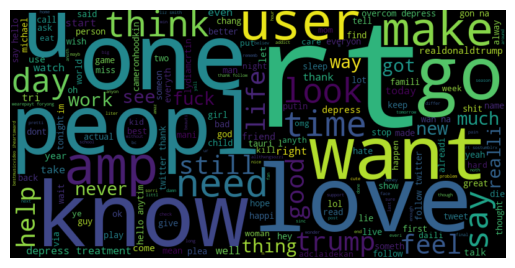

In [12]:
# Word Cloud Visualization
#Create a plot of the most frequently used words.
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [13]:
# Model Training & Prediction
#Random Forest learns patterns from these word representations and classifies them into categories (e.g., mental health issues vs. non-issues).

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.813
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1981
           1       0.83      0.80      0.81      2019

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



The model is reasonably good but could be improved using better feature selection, hyperparameter tuning, or advanced models like BERT.

In [16]:
#Sentiment Analsis
# Install the Vader lexicon 
import nltk
nltk.download('vader_lexicon')

# Import VADER SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aditi\AppData\Roaming\nltk_data...


In [21]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

In [22]:
# Sentiment Analysis
df['sentiment_score'] = df['post_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Categorize into Positive, Negative, Neutral
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [23]:
# Display first few results
print(df[['post_text', 'sentiment', 'sentiment_score']].head(10))

                                           post_text sentiment  \
0  It's just over 2 years since I was diagnosed w...   Neutral   
1  It's Sunday, I need a break, so I'm planning t...   Neutral   
2  Awake but tired. I need to sleep but my brain ...  Negative   
3  RT @SewHQ: #Retro bears make perfect gifts and...  Positive   
4  It’s hard to say whether packing lists are mak...  Positive   
5  Making packing lists is my new hobby... #movin...   Neutral   
6  At what point does keeping stuff for nostalgic...   Neutral   
7  Currently in the finding-boxes-of-random-shit ...   Neutral   
8  Can't be bothered to cook, take away on the wa...  Positive   
9  RT @itventsnews: ITV releases promo video for ...   Neutral   

   sentiment_score  
0           0.0000  
1           0.0000  
2          -0.5927  
3           0.8550  
4           0.3400  
5           0.0000  
6           0.0000  
7           0.0000  
8           0.2411  
9           0.0000  


In [24]:
print(df['sentiment'].value_counts())

sentiment
Neutral     7384
Positive    7279
Negative    5337
Name: count, dtype: int64


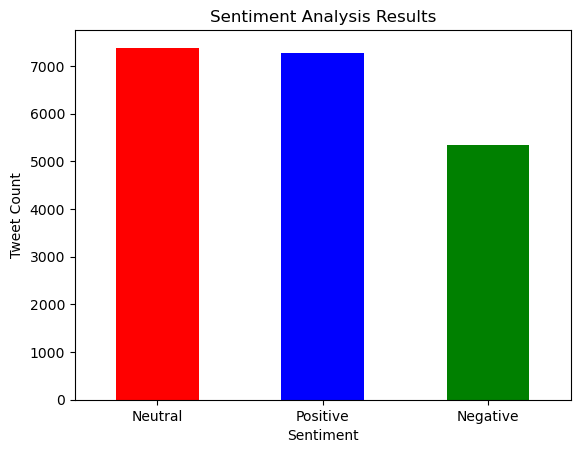

In [25]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

Conclusion:
This project analyzes tweets related to mental health using NLP. It cleans the text by removing unnecessary words, breaking sentences into words, and simplifying them. We then extract important features, find topics, and analyze the emotions in the tweets. A Random Forest model helps classify the tweets and the identify the person have mental health issue or not. The results can be useful for understanding mental health trends, identifying warning signs, and monitoring social media discussions on mental health.

Future Scope:
i) Try advanced AI models like BERT or LSTM to improve accuracy.
ii) Analyze live tweets using Twitter API to track mental health discussions as they happen.
iii) Use this system to help doctors and therapists detect mental health issues earlier.